In [2]:
import matplotlib.pyplot as plt
from math import pi, sqrt

$\pi$ can be calculated as:
$$
    \pi = \frac{1}{\frac{1}{2}
                   \sqrt{\frac{1}{2}}
                   \sqrt{\frac{1}{2} + \frac{1}{2}\sqrt{\frac{1}{2}}}
                   \sqrt{\frac{1}{2} + \frac{1}{2}\sqrt{\frac{1}{2} + \frac{1}{2}\sqrt{\frac{1}{2}}}                           \cdots}}
$$

In [3]:
def compute_pi(n: int) -> float:
    value = 0.5
    multiplier = sqrt(0.5)
    for _ in range(n):
        value *= multiplier
        multiplier = sqrt(0.5 + 0.5*multiplier)
    return 1.0/value

Visualize the result for a range of $n$-values.

In [4]:
max_n = 20
n_values = list(range(max_n + 1))
pi_values = [compute_pi(n) for n in n_values]
error_values = [(pi - pi_value)/pi for pi_value in pi_values]

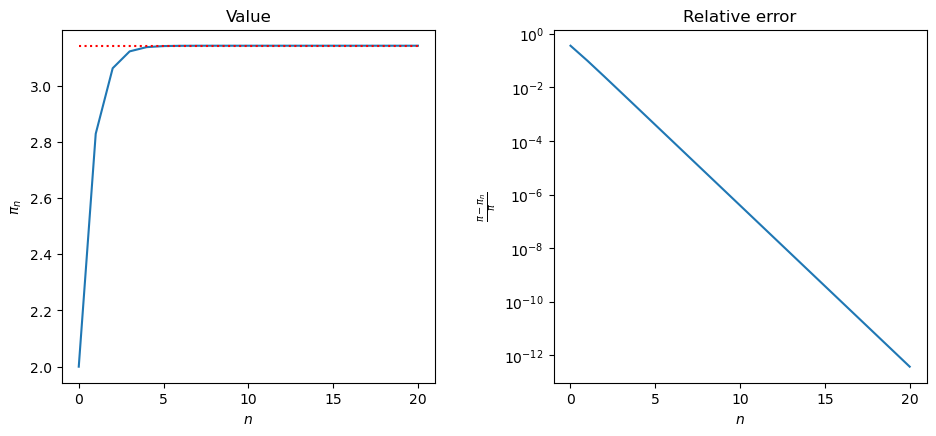

In [5]:
figure, axes = plt.subplots(1, 2)
figure.set_size_inches(10, 5)
axes[0].plot(n_values, pi_values)
axes[0].plot(n_values, [pi]*len(n_values), 'r:')
axes[0].set_xlabel(r'$n$')
axes[0].set_ylabel(r'$\pi_n$')
axes[0].set_title('Value')
axes[1].plot(n_values, error_values)
axes[1].set_yscale('log')
axes[1].set_xlabel(r'$n$')
axes[1].set_ylabel(r'$\frac{\pi - \pi_n}{\pi}$')
axes[1].set_title('Relative error')
figure.tight_layout(pad=3.0)

This formula can be proved using the following identidy:
$$
  2^n \sin \frac{\alpha}{2^n} = \frac{\sin \alpha}{\cos \frac{\alpha}{2} \cdot
                                                   \cos \frac{\alpha}{4} \cdot \cdots \cdot
                                                   \cos \frac{\alpha}{2^n}}
$$

This can be proved by induction.  For $n = 1$, you have
$$
  \sin \alpha = 2 \sin \frac{\alpha}{2} \cos \frac{\alpha}{2},
$$
a well-known identity.

For $n + 1$, the left-hend side is:
$$
  \begin{array}{rcl}
    2^{n + 1} \sin \frac{\alpha}{2^{n + 1}} & = & 2 \cdot 2^n \sin \frac{\alpha}{2 \cdot 2^n} \\
                                            & = & 2 \cdot 2^n \frac{\sin \frac{\alpha}{2^n}}{2 \cos \frac{\alpha}{2^n}} \\
                                            & = & \frac{1}{\cos \frac{\alpha}{2^n}} 2^n \sin \frac{\alpha}{2^n}
  \end{array}
$$
For the right-hand side of the identity, you have
$$
  \frac{\sin \alpha}{\cos \frac{\alpha}{2} \cdot
                     \cos \frac{\alpha}{4} \cdot \cdots \cdot
                     \cos \frac{\alpha}{2^n} \cdot
                     \cos \frac{\alpha}{2^{n + 1}}}
$$
Hence, if the identity holds for $n + 1$, it holds for $n$ as well.  This proves the identity for all values of $n \ge 1$.

Since
$$
  \lim_{\theta \to 0} \frac{\sin \theta}{\theta} = 1,
$$
it follows that
$$
  \lim_{n \to \infty} 2^n \sin \frac{\alpha}{2^n} = \alpha \lim_{n \to \infty} \frac{\sin \frac{\alpha}{2^n}}{\frac{\alpha}{2^n}} = \alpha.
$$
Hence, for $n \to \infty$, the identity reduces to
$$
  \alpha = \frac{\sin \alpha}{\cos \frac{\alpha}{2} \cdot
                              \cos \frac{\alpha}{4} \cdot
                              \cos \frac{\alpha}{8} \cdot \cdots}.
$$

Another well-known identify provides the last missing piece:
$$
  \cos \alpha = \cos^2 \frac{\alpha}{2} - 1
$$
or
$$
  \cos \frac{\alpha}{2} = \sqrt{\frac{1}{2} + \frac{1}{2} \cos \alpha}
$$

Substituting this identity repeatedly yields
$$
  \alpha = \frac{\sin \alpha}{\cos \frac{\alpha}{2} \cdot
                              \sqrt{\frac{1}{2} + \frac{1}{2} \cos \frac{\alpha}{2}} \cdot
                              \sqrt{\frac{1}{2} + \frac{1}{2} \sqrt{\frac{1}{2} + \frac{1}{2} \cos \frac{\alpha}{2}}} \cdot \cdots}.
$$
For $\alpha = \pi/2$ you have $\sin \alpha = 1$ and $\cos \alpha/2 = \sqrt{1/2}$, so
$$
  \frac{\pi}{2} = \frac{1}{\sqrt{\frac{1}{2}} \cdot
                           \sqrt{\frac{1}{2} + \frac{1}{2} \sqrt{\frac{1}{2}}} \cdot
                           \sqrt{\frac{1}{2} + \frac{1}{2} \sqrt{\frac{1}{2} + \frac{1}{2} \sqrt{\frac{1}{2}}}} \cdot \cdots},
$$
QED.